In [1]:
import numpy as np
import awkward as ak
import uproot
import src.functions as fn
from pylab import cm
import matplotlib.pyplot as plt
import src.Network as net
import sys
import time
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%matplotlib notebook

import mplhep as hep

# Make plots look more HEP-like
plt.style.use(hep.style.ROOT)

In [3]:
fileName="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E100Eta1p62Delta2_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225819/0000/ntuples.root"
fileNameDelta2p5="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E100Eta1p62Delta2p5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225832/0000/ntuples.root"
fileNameDelta3="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E100Eta1p62Delta3_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225846/0000/ntuples.root"
fileNameDelta5="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E100Eta1p62Delta5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225928/0000/ntuples.root"
fileNameE50Delta2="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E50Eta1p62Delta2_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225716/0000/ntuples.root"
#fileNameDelta2p5="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E50Eta1p62Delta2p5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225726/0000/ntuples.root"
#fileNameDelta3="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E50Eta1p62Delta3_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225737/0000/ntuples.root"
fileNameE50Delta5="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E50Eta1p62Delta5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225808/0000/ntuples.root"
file=uproot.open(fileName)
fileDelta2p5=uproot.open(fileNameDelta2p5)
fileDelta3=uproot.open(fileNameDelta3)
fileDelta5=uproot.open(fileNameDelta5)
fileE50Delta2=uproot.open(fileNameE50Delta2)
fileE50Delta5=uproot.open(fileNameE50Delta5)

In [4]:
tracksters=file["ana/tracksters"]
vertices_E = tracksters['vertices_energy'].array()
vertices_indexes = tracksters['vertices_indexes'].array()
vertices_x = tracksters['vertices_x'].array()
vertices_y = tracksters['vertices_y'].array()
vertices_z = tracksters['vertices_z'].array()
vertices_layers=tracksters['vertices_layer'].array()
trackster_E=tracksters['raw_energy'].array()
trackster_phi=tracksters['trackster_barycenter_phi'].array()
trackster_eta=tracksters['trackster_barycenter_eta'].array()

trackstersE50D2=fileE50Delta2["ana/tracksters"]
verticesE50D2_E = trackstersE50D2['vertices_energy'].array()
verticesE50D2_indexes = trackstersE50D2['vertices_indexes'].array()
tracksterE50D2_E=trackstersE50D2['raw_energy'].array()
#vertices_x = tracksters['vertices_x'].array()
#vertices_y = tracksters['vertices_y'].array()
#vertices_z = tracksters['vertices_z'].array()
#vertices_layers=tracksters['vertices_layer'].array()

trackstersE50D5=fileE50Delta5["ana/tracksters"]
verticesE50D5_E = trackstersE50D5['vertices_energy'].array()
verticesE50D5_indexes = trackstersE50D5['vertices_indexes'].array()
tracksterE50D5_E=trackstersE50D5['raw_energy'].array()

trackstersD2p5=fileDelta2p5["ana/tracksters"]
verticesD2p5_E = trackstersD2p5['vertices_energy'].array()
verticesD2p5_indexes = trackstersD2p5['vertices_indexes'].array()
verticesD2p5_x = trackstersD2p5['vertices_x'].array()
verticesD2p5_y = trackstersD2p5['vertices_y'].array()
verticesD2p5_z = trackstersD2p5['vertices_z'].array()
verticesD2p5_layers=trackstersD2p5['vertices_layer'].array()
tracksterD2p5_E=trackstersD2p5['raw_energy'].array()
tracksterD2p5_EReg=trackstersD2p5['regressed_energy'].array()
tracksterD2p5_phi=trackstersD2p5['trackster_barycenter_phi'].array()
tracksterD2p5_eta=trackstersD2p5['trackster_barycenter_eta'].array()

trackstersD3=fileDelta3["ana/tracksters"]
verticesD3_E = trackstersD3['vertices_energy'].array()
verticesD3_indexes = trackstersD3['vertices_indexes'].array()
tracksterD3_E=trackstersD3['raw_energy'].array()

trackstersD5=fileDelta5["ana/tracksters"]
verticesD5_E = trackstersD5['vertices_energy'].array()
verticesD5_indexes = trackstersD5['vertices_indexes'].array()
verticesD5_x = trackstersD5['vertices_x'].array()
verticesD5_y = trackstersD5['vertices_y'].array()
verticesD5_z = trackstersD5['vertices_z'].array()
verticesD5_layers=trackstersD5['vertices_layer'].array()
tracksterD5_E=trackstersD5['raw_energy'].array()
tracksterD5_EReg=trackstersD5['regressed_energy'].array()
tracksterD5_phi=trackstersD5['trackster_barycenter_phi'].array()
tracksterD5_eta=trackstersD5['trackster_barycenter_eta'].array()


In [ ]:
print(trackster_phi)

In [ ]:
#%matplotlib inline
plt.figure(figsize=(7,5))
print(ak.count(trackster_E,axis=1))
plt.hist(ak.count(trackster_E,axis=1),bins=4,range=(0.5,4.5),histtype="step",label="E100_D2")
#plt.hist(ak.count(tracksterD2p5_E,axis=1),bins=6,range=(0.5,6.5),histtype="step",label="2p5")
#plt.hist(ak.count(tracksterD3_E,axis=1),bins=4,range=(1.5,5.5),histtype="step",label="3")
plt.hist(ak.count(tracksterD5_E,axis=1),bins=4,range=(0.5,4.5),histtype="step",label="E100_D5")
plt.hist(ak.count(tracksterE50D5_E,axis=1),bins=4,range=(0.5,4.5),histtype="step",label="E50_D5")
plt.hist(ak.count(tracksterE50D2_E,axis=1),bins=4,range=(0.5,4.5),histtype="step",label="E50_D2")
plt.legend()
plt.show()

In [ ]:
#%matplotlib inline
plt.figure(figsize=(7,5))
plt.hist(ak.flatten(trackster_E),bins=100,range=(0,200),histtype="step",label="E100D2")
plt.hist(ak.flatten(tracksterD5_E),bins=100,range=(0,200),histtype="step",label="E100D5")
plt.hist(ak.flatten(tracksterE50D2_E),bins=100,range=(0,200),histtype="step",label="E50D2")
plt.hist(ak.flatten(tracksterE50D5_E),bins=100,range=(0,200),histtype="step",label="E50D5")
#plt.hist(ak.flatten(tracksterD3_E),bins=50,histtype="step",label="3")
#plt.hist(ak.flatten(tracksterD2p5_E),bins=50,histtype="step",label="2p5")
print(len(ak.flatten(trackster_E)))
print(len(ak.flatten(tracksterD5_E)))
print(len(ak.flatten(tracksterE50D2_E)))
print(len(ak.flatten(tracksterE50D5_E)))
plt.legend()
plt.show()

In [ ]:
#%matplotlib inline
plt.figure(figsize=(7,5))
print(ak.flatten(ak.count(vertices_indexes,axis=2)))
print(len(vertices_indexes))
print(len(verticesD5_indexes))
plt.hist(ak.flatten(ak.count(vertices_indexes,axis=2)),bins=20,range=(0,50),histtype="step",label="E100D2")
plt.hist(ak.flatten(ak.count(verticesD5_indexes,axis=2)),bins=20,range=(0,50),histtype="step",label="E100D5")
plt.hist(ak.flatten(ak.count(verticesE50D2_indexes,axis=2)),bins=20,range=(0,50),histtype="step",label="E50D2")
plt.hist(ak.flatten(ak.count(verticesE50D5_indexes,axis=2)),bins=20,range=(0,50),histtype="step",label="E50D5")
#plt.hist(ak.flatten(ak.count(verticesD3_indexes,axis=2)),bins=20,range=(0,50),histtype="step",label="3")
#plt.hist(ak.flatten(ak.count(verticesD2p5_indexes,axis=2)),bins=20,range=(0,50),histtype="step",label="2p5")
plt.legend()
plt.show()

In [ ]:
#%matplotlib inline
plt.figure(figsize=(7,5))
print(ak.flatten(ak.count(vertices_indexes,axis=2)))
print(len(vertices_indexes))
print(len(verticesD5_indexes))
plt.hist(ak.flatten(ak.count(vertices_indexes,axis=2))/ak.flatten(trackster_E),bins=50,range=(0,1),histtype="step",label="E100D2")
plt.hist(ak.flatten(ak.count(verticesD5_indexes,axis=2))/ak.flatten(tracksterD5_E),bins=50,range=(0,1),histtype="step",label="E100D5")
plt.hist(ak.flatten(ak.count(verticesE50D2_indexes,axis=2))/ak.flatten(tracksterE50D2_E),bins=50,range=(0,1),histtype="step",label="E50D2")
plt.hist(ak.flatten(ak.count(verticesE50D5_indexes,axis=2))/ak.flatten(tracksterE50D5_E),bins=50,range=(0,1),histtype="step",label="E50D5")
#plt.hist(ak.flatten(ak.count(verticesD3_indexes,axis=2)),bins=20,range=(0,50),histtype="step",label="3")
#plt.hist(ak.flatten(ak.count(verticesD2p5_indexes,axis=2)),bins=20,range=(0,50),histtype="step",label="2p5")
plt.legend()
plt.show()

In [ ]:
#%matplotlib inline
plt.figure(figsize=(7,5))
print(ak.flatten(ak.count(vertices_indexes,axis=2)))
print(len(vertices_indexes))
print(len(verticesD5_indexes))
plt.hist(ak.flatten(ak.count(vertices_indexes,axis=2)),bins=20,range=(0,50),histtype="step",label="E100D2")
plt.hist(ak.flatten(ak.count(verticesD5_indexes,axis=2)),bins=20,range=(0,50),histtype="step",label="E100D5")
plt.hist(ak.flatten(ak.count(verticesE50D2_indexes,axis=2)),bins=20,range=(0,50),histtype="step",label="E50D2")
plt.hist(ak.flatten(ak.count(verticesE50D5_indexes,axis=2)),bins=20,range=(0,50),histtype="step",label="E50D5")
#plt.hist(ak.flatten(ak.count(verticesD3_indexes,axis=2)),bins=20,range=(0,50),histtype="step",label="3")
#plt.hist(ak.flatten(ak.count(verticesD2p5_indexes,axis=2)),bins=20,range=(0,50),histtype="step",label="2p5")
plt.legend()
plt.show()

In [ ]:
def plotEvent(fig,ax,tracksters,nEvent):
    indexes = tracksters['vertices_indexes'].array()[nEvent]
    x = tracksters['vertices_x'].array()[nEvent]
    y = tracksters['vertices_y'].array()[nEvent]
    z = tracksters['vertices_z'].array()[nEvent]
    E = tracksters['vertices_energy'].array()[nEvent]
    NTracks=len(x)
    #print(NTracks)
    ax.set_xlabel('X (cm)')
    ax.set_ylabel('Y (cm)')
    ax.set_zlabel('Z (cm)')
    colmap = cm.ScalarMappable(cmap=cm.viridis)
    
    for i in range(NTracks):
        yg =ax.scatter(x[i], y[i], z[i], marker='o') 
    
    
    plt.show()

In [ ]:
%matplotlib notebook
plt.style.use("default")
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

plotEvent(fig,ax,tracksters,7)

In [ ]:
print(trackster_E[17])

In [ ]:
mask2=ak.any(E150t30mask,axis=1)
xMasked=vertices_x[mask2]
yMasked=vertices_y[mask2]
zMasked=vertices_z[mask2]
eMasked=vertices_E[mask2]
#print(ak.any(E150t30mask,axis=1))
print(len(xMasked))

In [ ]:
def plotOddEvent(fig,ax,xMasked,yMasked,zMasked,nEvent):
    #indexes = tracksters['vertices_indexes'].array()[nEvent]
    x = xMasked[nEvent]
    y = yMasked[nEvent]
    z = zMasked[nEvent]
    #E = tracksters['vertices_energy'].array()[nEvent]
    NTracks=len(x)
    #print(NTracks)
    ax.set_xlabel('X (cm)')
    ax.set_ylabel('Y (cm)')
    ax.set_zlabel('Z (cm)')
    colmap = cm.ScalarMappable(cmap=cm.viridis)
    
    for i in range(NTracks):
        yg =ax.scatter(x[i], y[i], z[i], marker='o') 
    
    
    plt.show()

In [ ]:
%matplotlib notebook
plt.style.use("default")
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
plotOddEvent(fig,ax,xMasked,yMasked,zMasked,20)

In [ ]:

plt.figure(figsize=(7,5))
plt.hist(ak.flatten(ak.count(xMasked,axis=1)),bins=10)
plt.show()

In [ ]:
print(len(ak.count(xMasked,axis=-2)))

In [ ]:
print(ak.count(xMasked,axis=-1))

In [ ]:
print(ak.count(ak.sum(eMasked,axis=-1),axis=1))

In [ ]:

plt.figure(figsize=(7,5))
plt.hist(ak.count(ak.sum(eMasked,axis=-1),axis=1),bins=10)
plt.show()

In [ ]:
hackFileName="/eos/user/b/bmaier/ticl_ml_hackathon/samples/landingzone/two_closeby_photons_pu0/ntuples_13801550_555.root"
hackFile=uproot.open(hackFileName)

In [ ]:
hackTrackster=hackFile['ticlNtuplizer/tracksters']
hackTrackster.keys()

In [ ]:
hackBarycenter_x=hackTrackster['barycenter_x'].array()
hackBarycenter_y=hackTrackster['barycenter_y'].array()

print(hackBarycenter_x)
hackBarycenter_R=np.sqrt(hackBarycenter_y**2+hackBarycenter_x**2)
print(ak.count(hackBarycenter_R,axis=-1))
plt.figure(figsize=(7,5))
plt.hist(ak.count(hackBarycenter_R,axis=-1))

In [ ]:
ak.sum(np.abs(hackBarycenter_R[:,0]-hackBarycenter_R) < 2.5,axis=1)

In [ ]:
plt.figure(figsize=(7,5))
plt.hist(ak.flatten(np.abs(hackBarycenter_R[:,0]-hackBarycenter_R)),bins=20)

In [ ]:
ak.count(hackBarycenter_R)

In [ ]:
mask=ak.all(np.abs(hackBarycenter_R[:,0]-hackBarycenter_R)<2,axis=1)
print(ak.sum(mask))

In [ ]:
hackMasked_x=hackTrackster['vertices_x'].array()[mask]
hackMasked_y=hackTrackster['vertices_y'].array()[mask]
hackMasked_z=hackTrackster['vertices_z'].array()[mask]

In [ ]:
print(hackMasked_x[0,])

In [ ]:
def plotOddHackEvent(fig,ax,xMasked,yMasked,zMasked,nEvent):
    #indexes = tracksters['vertices_indexes'].array()[nEvent]
    x = xMasked[nEvent]
    y = yMasked[nEvent]
    z = zMasked[nEvent]
    #E = tracksters['vertices_energy'].array()[nEvent]
    NTracks=len(x)
    #print(NTracks)
    ax.set_xlabel('X (cm)')
    ax.set_ylabel('Y (cm)')
    ax.set_zlabel('Z (cm)')
    colmap = cm.ScalarMappable(cmap=cm.viridis)
    
    for i in range(NTracks):
        yg =ax.scatter(x[i], y[i], z[i], marker='o') 
    
    
    plt.show()

In [ ]:
print(len(hackMasked_x))

In [ ]:
%matplotlib notebook
plt.style.use("default")
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
n=6
plotOddEvent(fig,ax,hackMasked_x,hackMasked_y,hackMasked_z,n)
print(hackBarycenter_R[mask][n])

In [ ]:
hackBarycenter_R=np.sqrt((hackBarycenter_y[:,0]-hackBarycenter_y)**2+(hackBarycenter_x-hackBarycenter_x)**2)

In [ ]:
mask2=ak.any((hackBarycenter_R <2.5) & (hackBarycenter_R >0),axis=1)

In [ ]:
hackMasked2_x=hackTrackster['vertices_x'].array()[mask2]
hackMasked2_y=hackTrackster['vertices_y'].array()[mask2]
hackMasked2_z=hackTrackster['vertices_z'].array()[mask2]

In [ ]:
%matplotlib notebook
plt.style.use("default")
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
n=7
plotOddEvent(fig,ax,hackMasked2_x,hackMasked2_y,hackMasked2_z,n)
print(hackBarycenter_R[mask2][n])

In [8]:
def plotEvent(tracksters,nEvent,heatmap="energy"):
    indexes = tracksters['vertices_indexes'].array()[nEvent]
    x = tracksters['vertices_x'].array()[nEvent]
    y = tracksters['vertices_y'].array()[nEvent]
    z = tracksters['vertices_z'].array()[nEvent]
    E = tracksters['vertices_energy'].array()[nEvent]
    NTracks=len(x)
    print(f"Event={nEvent}")
    print(f"Energy={ak.sum(E,axis=1)}")
    print(f"Number of nodes={ak.count(indexes,axis=1)}")
    
    for i in range(NTracks):
        fig = plt.figure(figsize=(8,6))
        ax = fig.add_subplot(111, projection='3d')
        edges_1 = fn.edgeBuilderNew(indexes[i],x[i],y[i],z[i],E[i])
        edges_1 = ak.flatten(edges_1[ak.num(edges_1) > 0].to_list())
        if(heatmap=="centrality"):
            heatmapVals=fn.nXCentralityPageRank(indexes[i],edges_1,True)
        elif(heatmap=="energy"):
            heatmapVals=E[i]
        yg =ax.scatter(x[i], y[i], z[i], marker='o') 
        ax.set_xlabel('X (cm)')
        ax.set_ylabel('Y (cm)')
        ax.set_zlabel('Z (cm)')
        colmap = cm.ScalarMappable(cmap=cm.viridis)
        if len(heatmapVals) > 0 :
            colmap.set_array(heatmapVals)
            yg = ax.scatter(x[i], y[i], z[i], c=cm.viridis(heatmapVals/max(heatmapVals)), marker='o', linewidth=2)
            cb = fig.colorbar(colmap,label=heatmap)
        else:
            yg =ax.scatter(x, y, z, marker='o') 

        if len(heatmap) > 0:
            
            for ind in edges_1:
                idx0 = ak.where(indexes[i] == ind.to_list()[0])[0][0]
                idx1 = ak.where(indexes[i] == ind.to_list()[1])[0][0]
                ax.plot(
                    [x[i][idx0] ,x[i][idx1]],
                    [y[i][idx0] ,y[i][idx1]],
                    [z[i][idx0] ,z[i][idx1]],
                    'black'
                )
        plt.show()


Event=103
Energy=[93.8, 94.5]
Number of nodes=[41, 20]


<IPython.core.display.Javascript object>


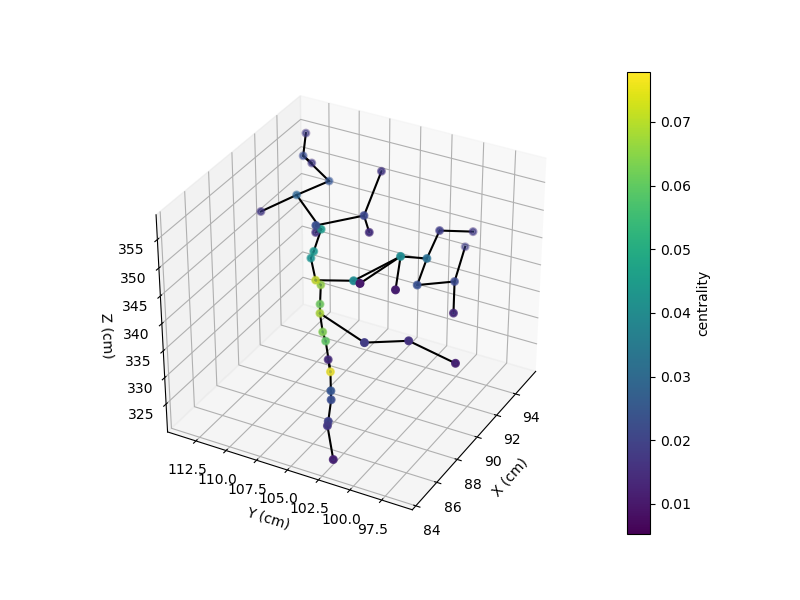

<IPython.core.display.Javascript object>


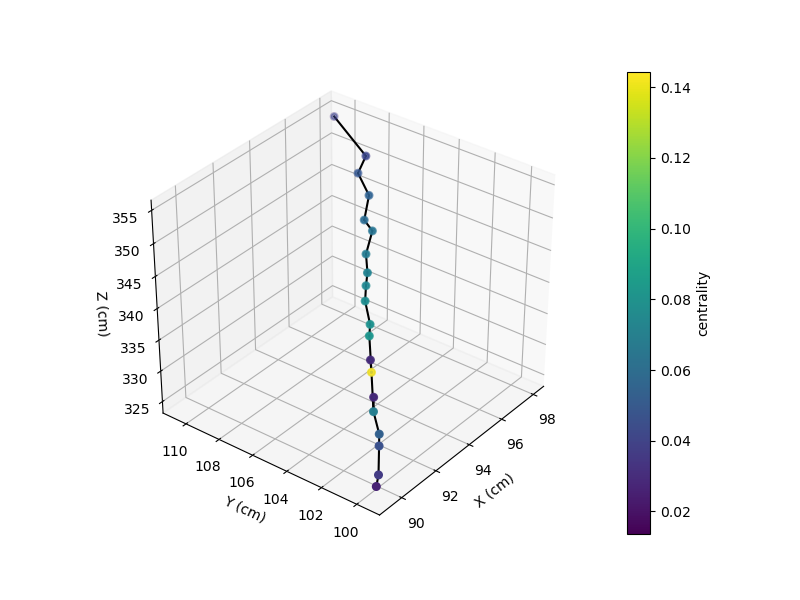

Event=360
Energy=[91.1, 92.7]
Number of nodes=[30, 22]


<IPython.core.display.Javascript object>


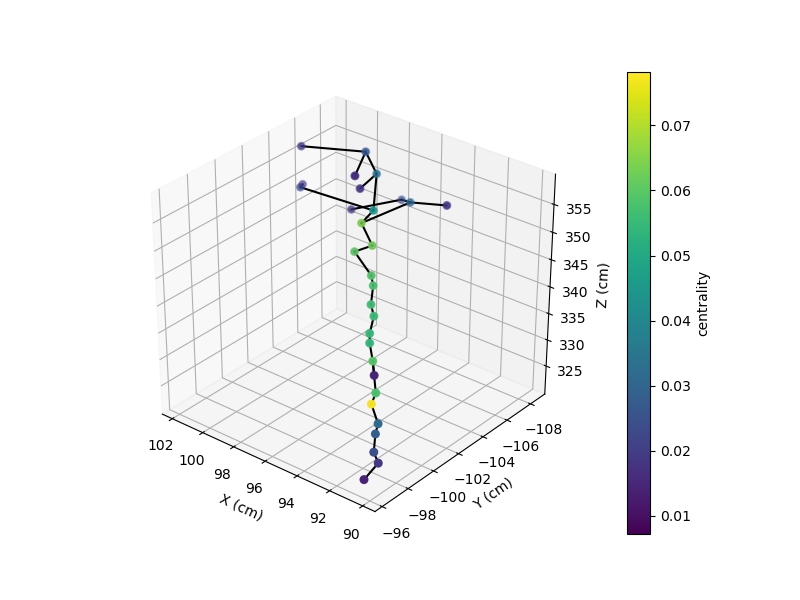

<IPython.core.display.Javascript object>


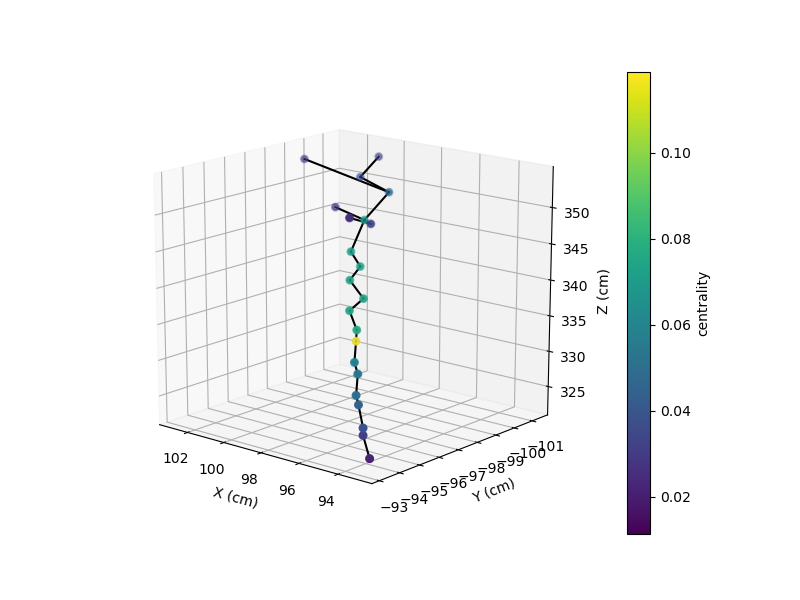

Event=167
Energy=[89.6, 90.8, 1.71]
Number of nodes=[25, 22, 10]


<IPython.core.display.Javascript object>


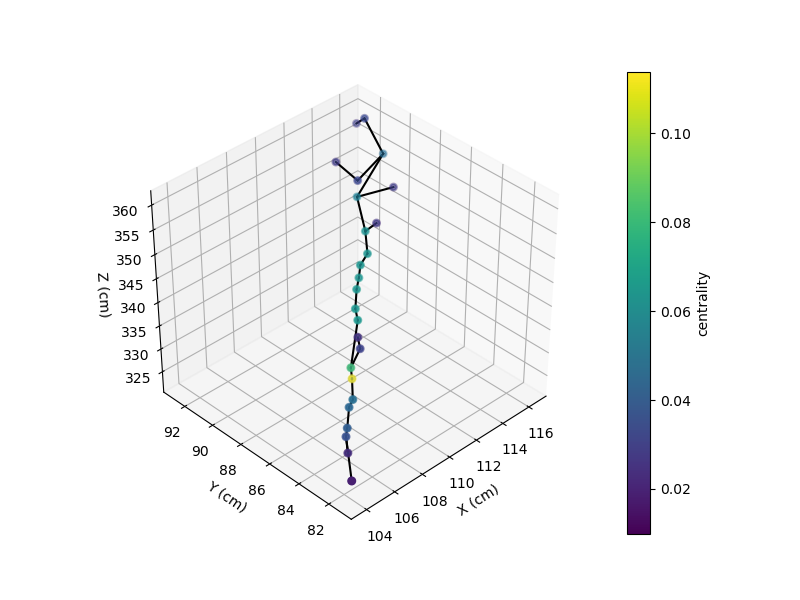

<IPython.core.display.Javascript object>


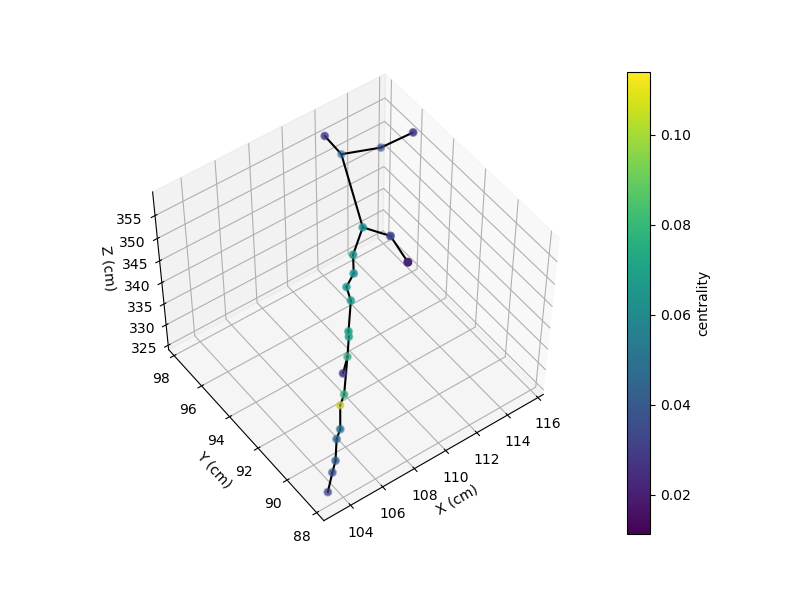

<IPython.core.display.Javascript object>


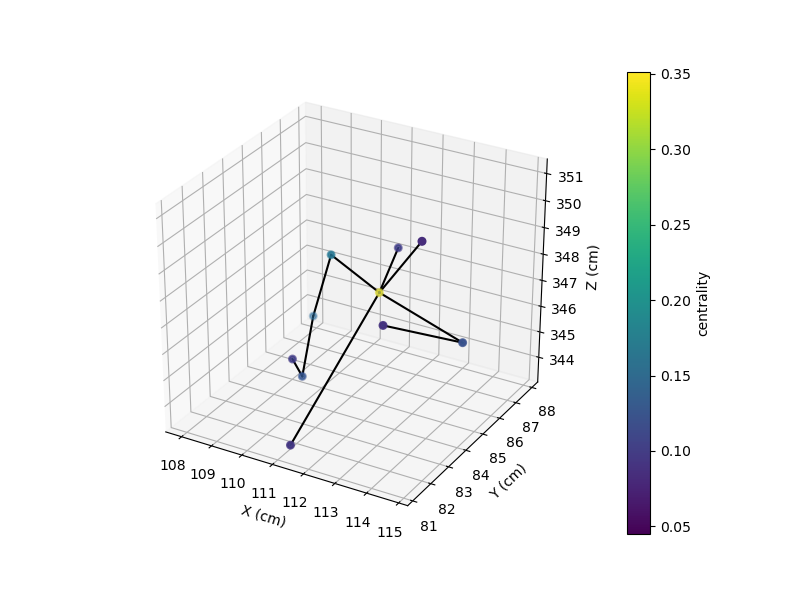

Event=168
Energy=[94.6, 95.3]
Number of nodes=[26, 26]


<IPython.core.display.Javascript object>


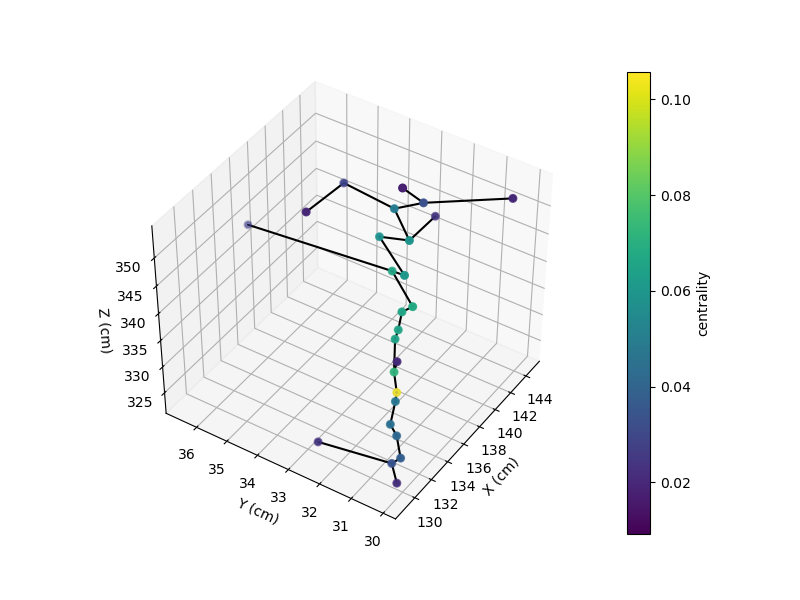

<IPython.core.display.Javascript object>


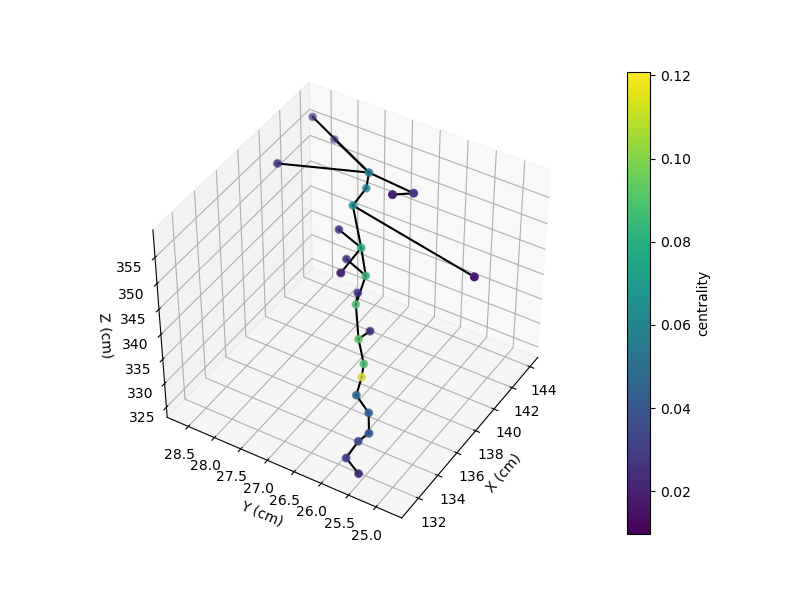

Event=254
Energy=[0.955, 91.8, 90.6]
Number of nodes=[2, 21, 23]


<IPython.core.display.Javascript object>


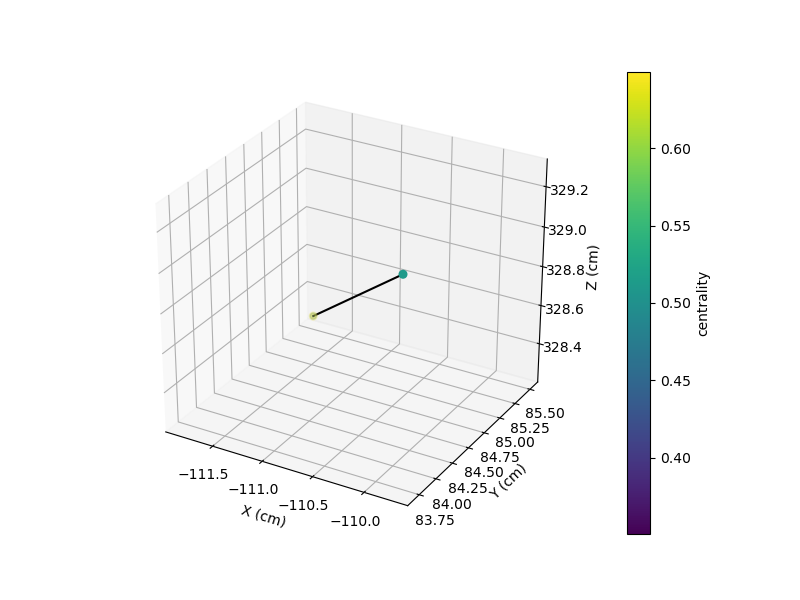

<IPython.core.display.Javascript object>


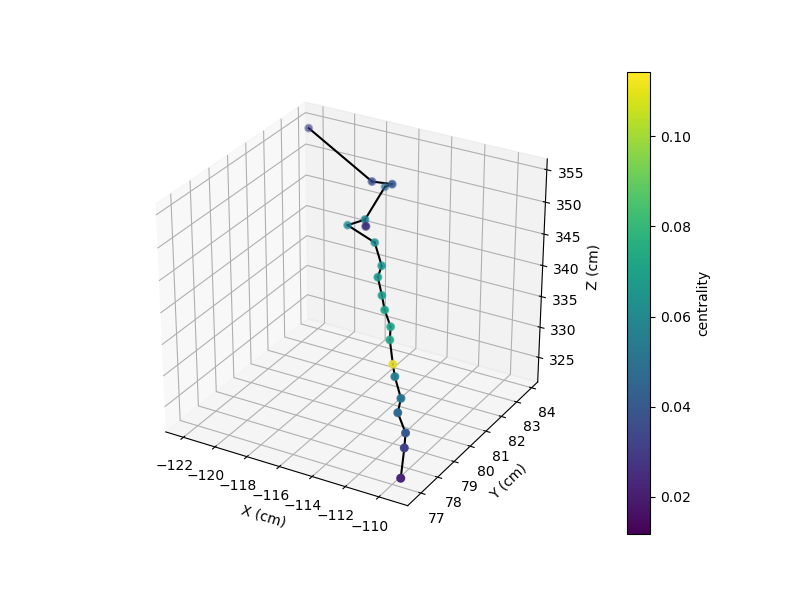

<IPython.core.display.Javascript object>


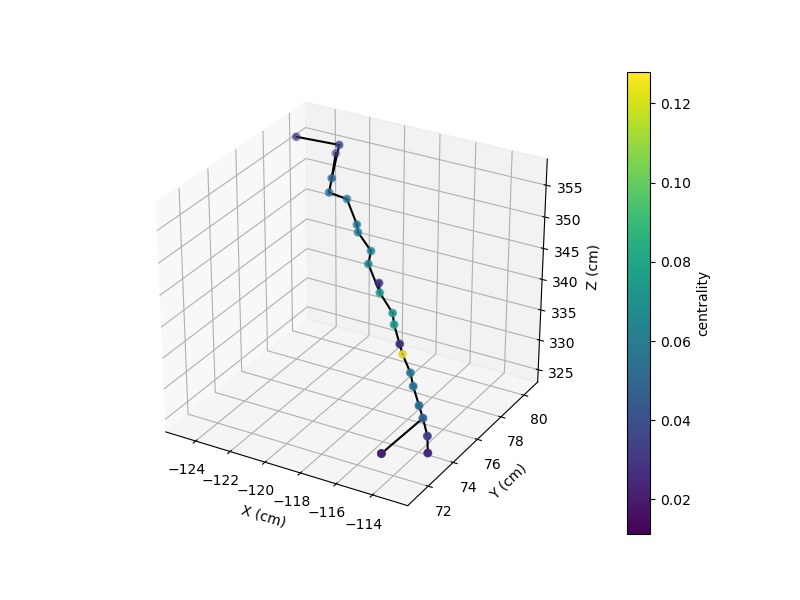

Event=77
Energy=[96.4, 91.9, 1.42]
Number of nodes=[32, 18, 5]


<IPython.core.display.Javascript object>


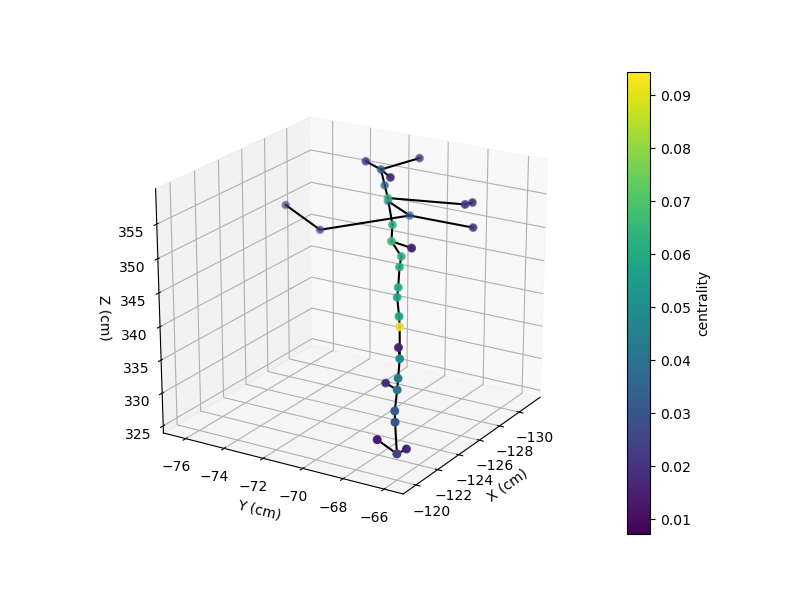

<IPython.core.display.Javascript object>


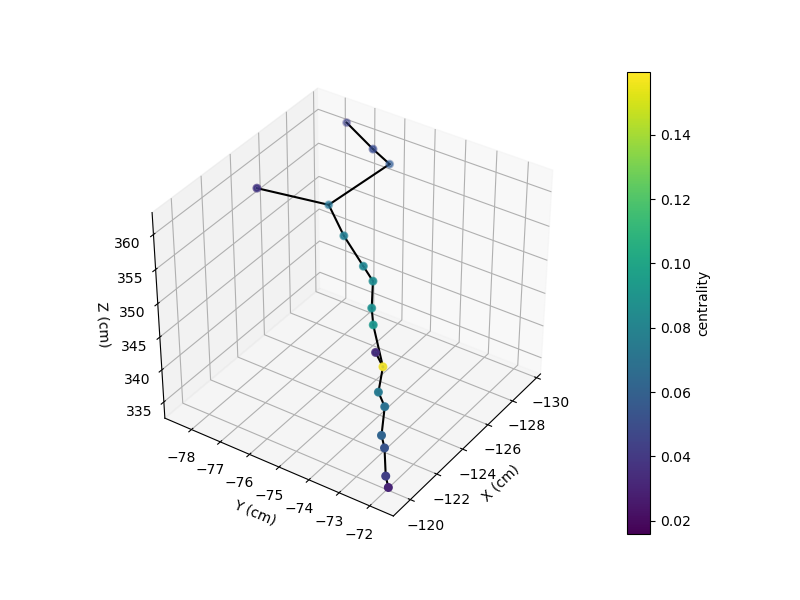

<IPython.core.display.Javascript object>


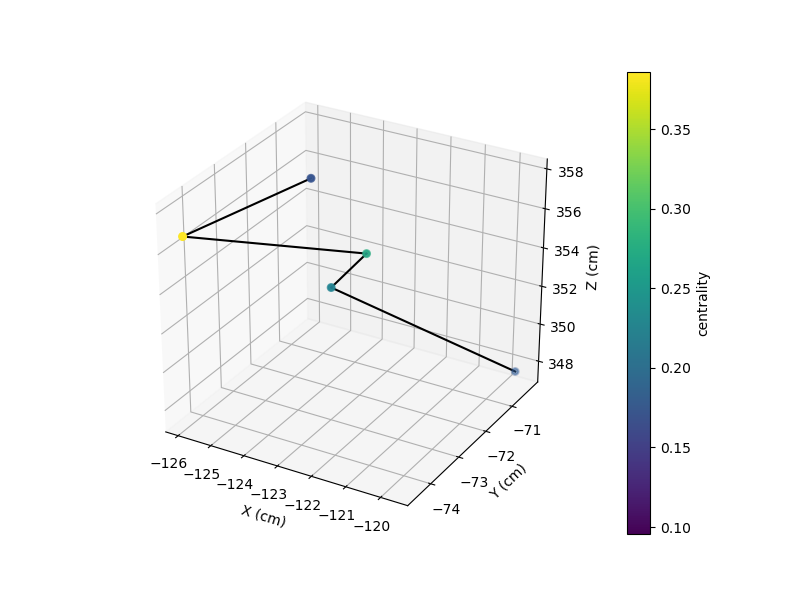

Event=413
Energy=[89, 96.4, 2.67]
Number of nodes=[27, 28, 5]


<IPython.core.display.Javascript object>


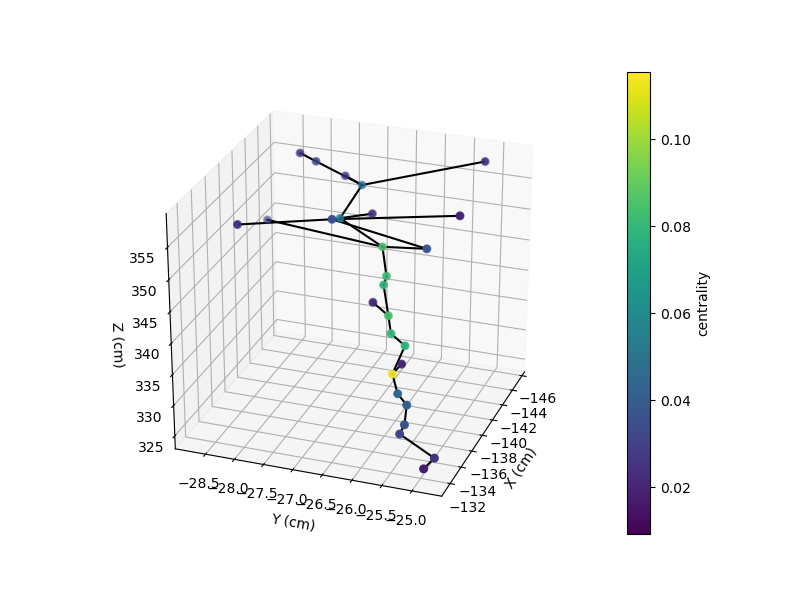

<IPython.core.display.Javascript object>


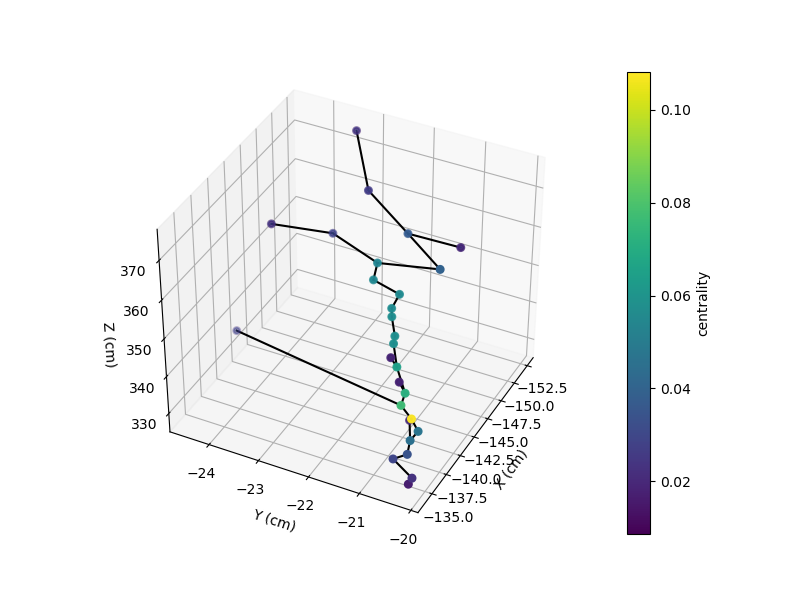

<IPython.core.display.Javascript object>


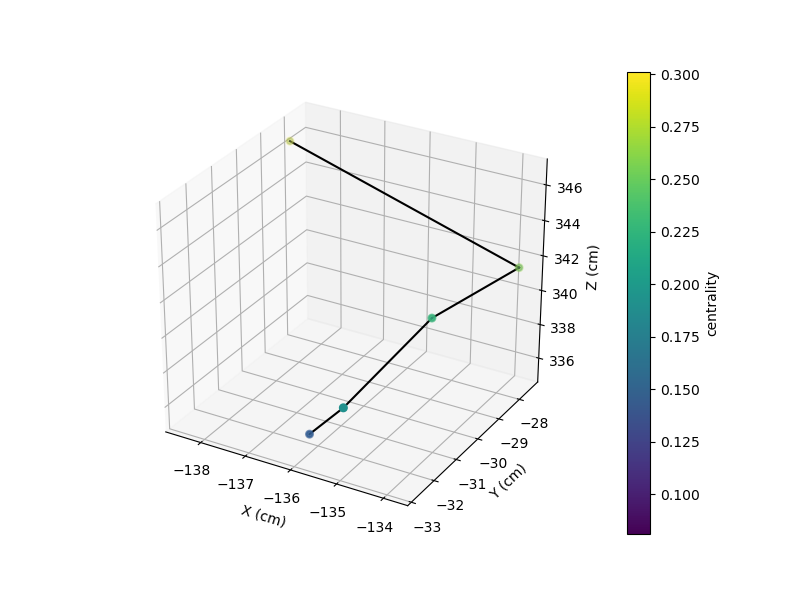

Event=413
Energy=[89, 96.4, 2.67]
Number of nodes=[27, 28, 5]


<IPython.core.display.Javascript object>


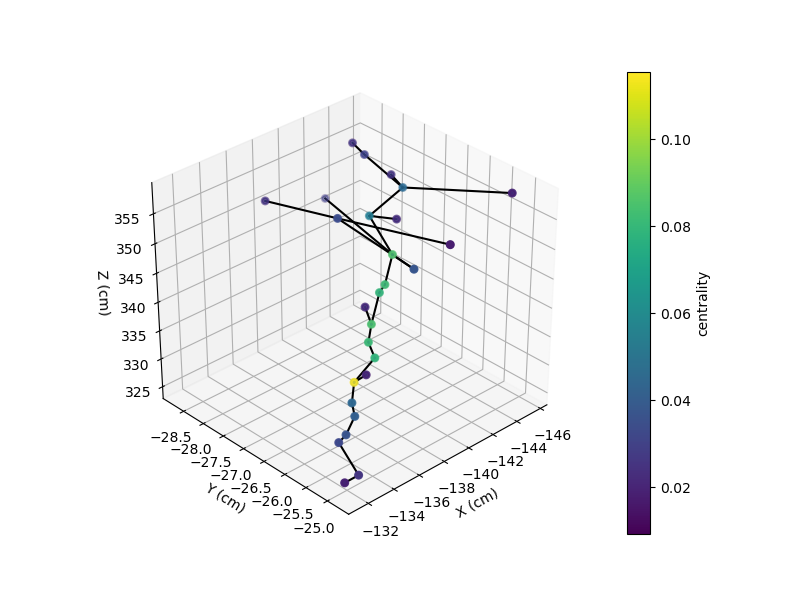

<IPython.core.display.Javascript object>


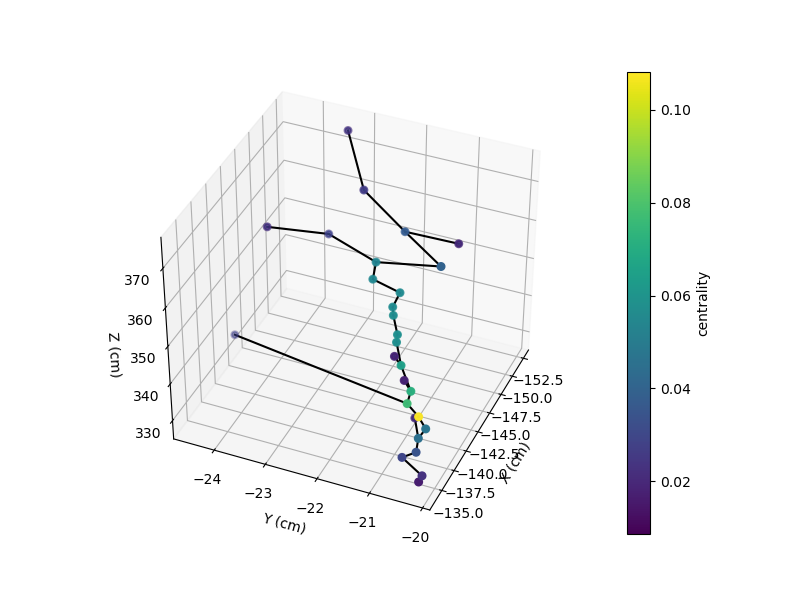

/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


<IPython.core.display.Javascript object>


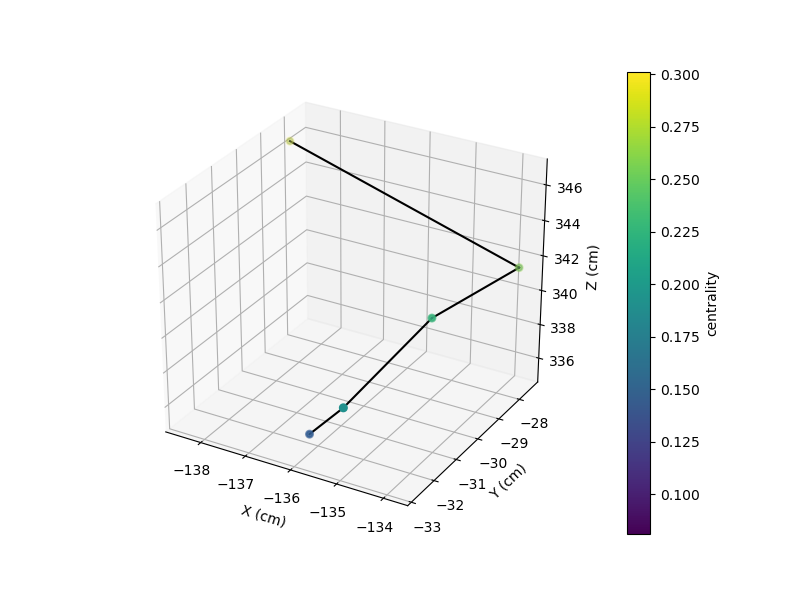

Event=411
Energy=[87.4, 1.09, 95.4]
Number of nodes=[25, 8, 31]


<IPython.core.display.Javascript object>


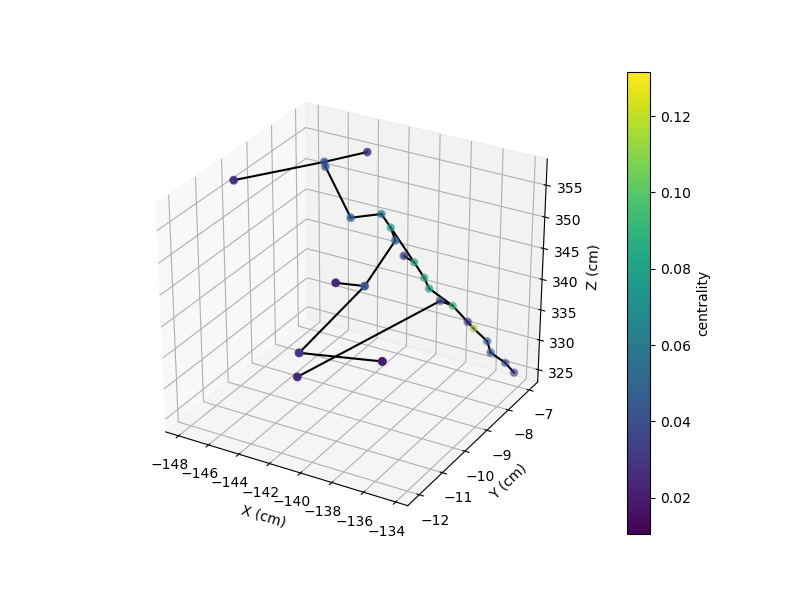

<IPython.core.display.Javascript object>


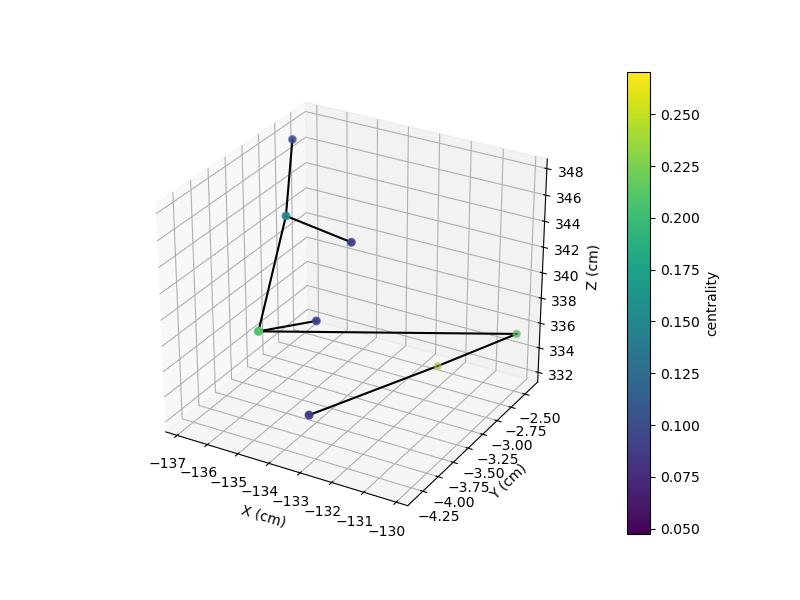

<IPython.core.display.Javascript object>


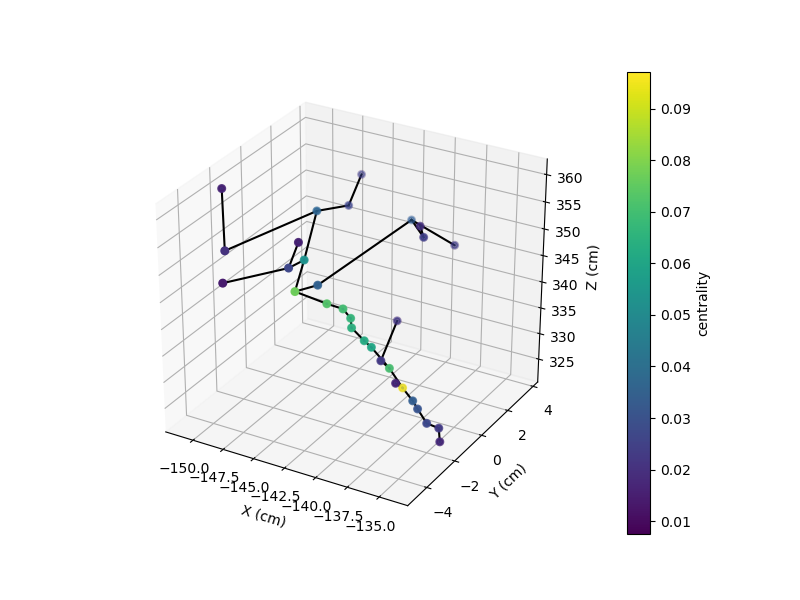

Event=247
Energy=[91.9, 98.3]
Number of nodes=[30, 21]


<IPython.core.display.Javascript object>


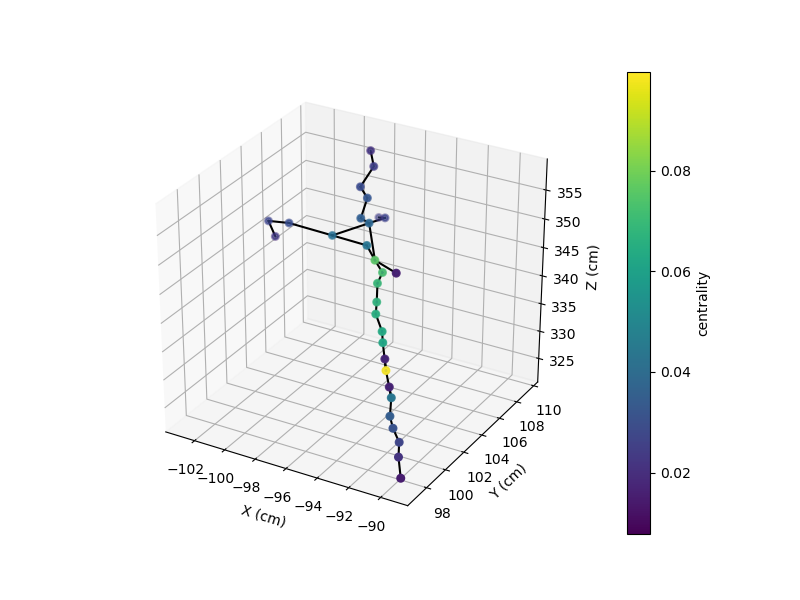

<IPython.core.display.Javascript object>


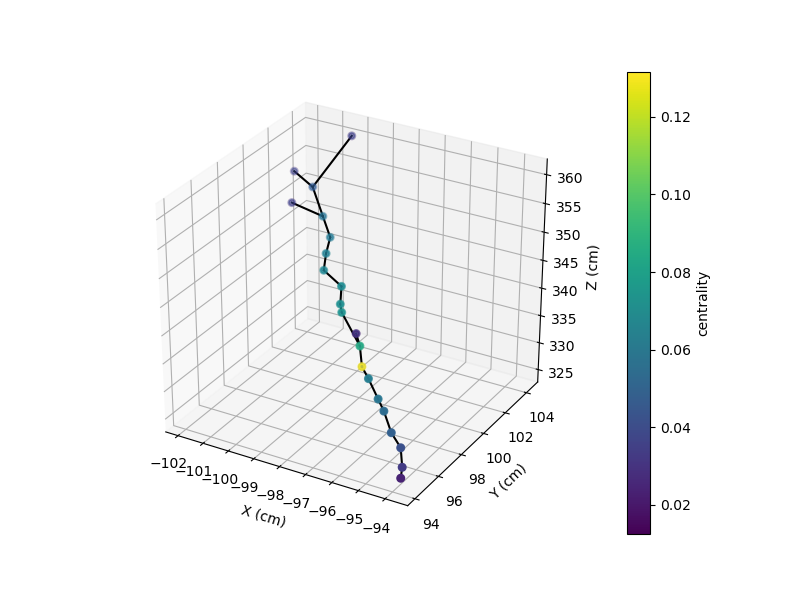

In [10]:
N=10
randomEvents=np.random.randint(0,450,N)

%matplotlib notebook
plt.style.use("default")

for i in randomEvents:
    
    plotEvent(trackstersD5,i,"centrality")


Event=110
Energy=[91.4]
Number of nodes=[29]


<IPython.core.display.Javascript object>


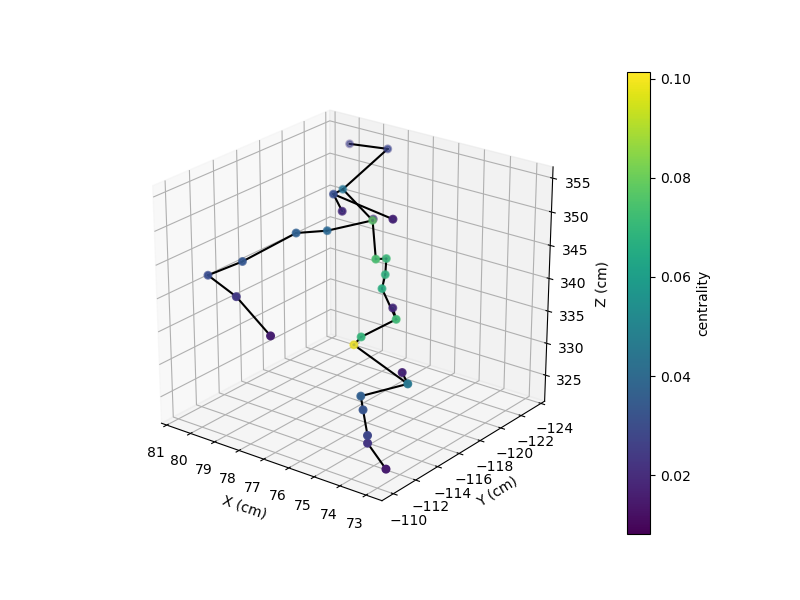

Event=336
Energy=[93.5]
Number of nodes=[31]


<IPython.core.display.Javascript object>


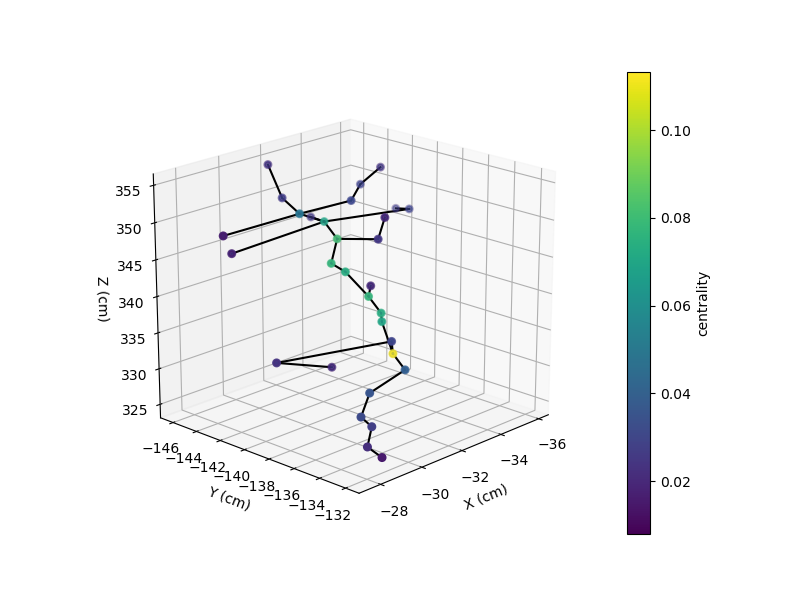

Event=38
Energy=[90.6]
Number of nodes=[28]


<IPython.core.display.Javascript object>


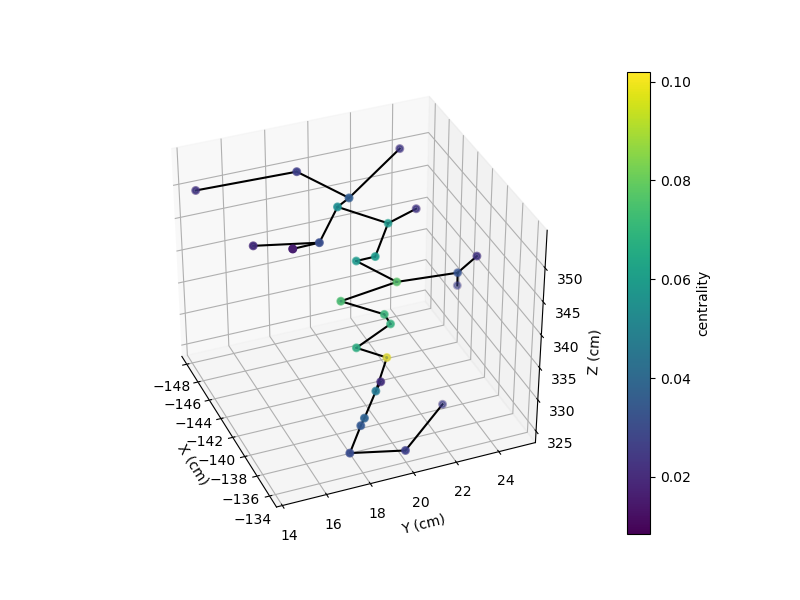

Event=383
Energy=[92.8]
Number of nodes=[23]


<IPython.core.display.Javascript object>


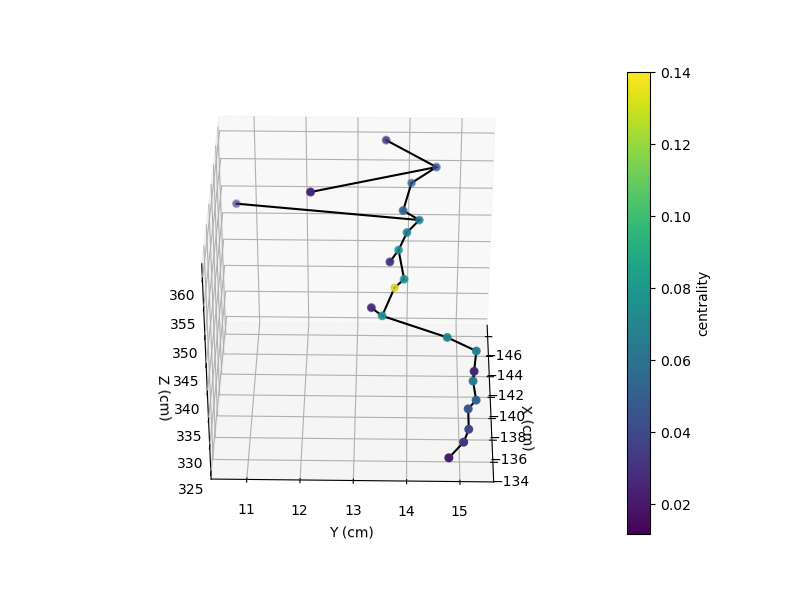

Event=438
Energy=[23.4, 68.1]
Number of nodes=[5, 26]


<IPython.core.display.Javascript object>


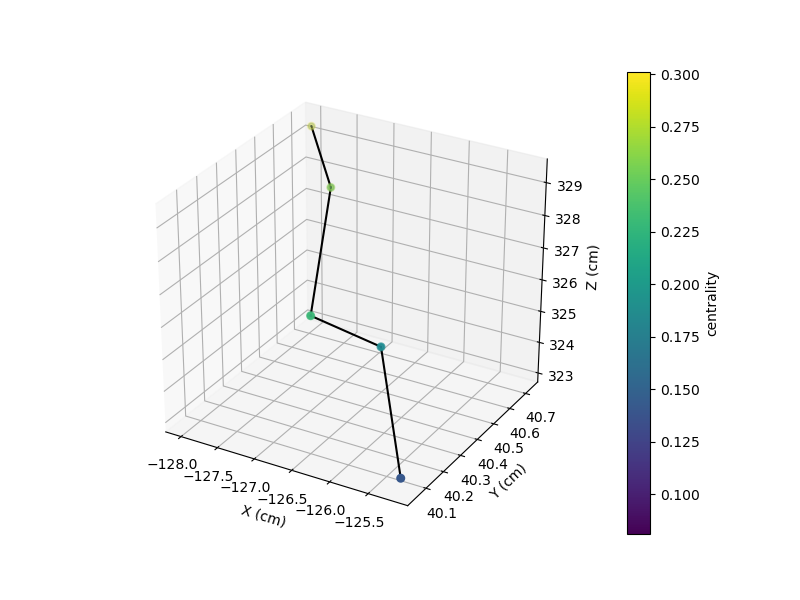

<IPython.core.display.Javascript object>


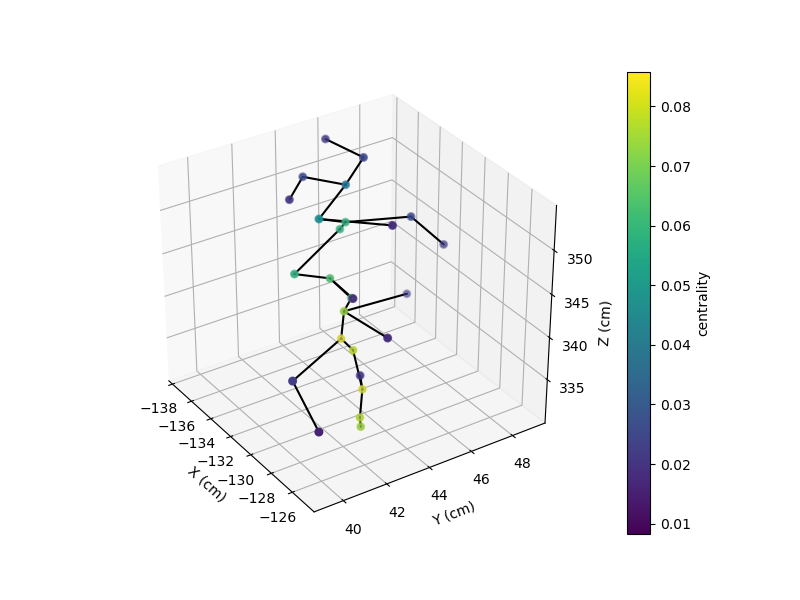

Event=95
Energy=[2.79, 90.7]
Number of nodes=[5, 24]


<IPython.core.display.Javascript object>


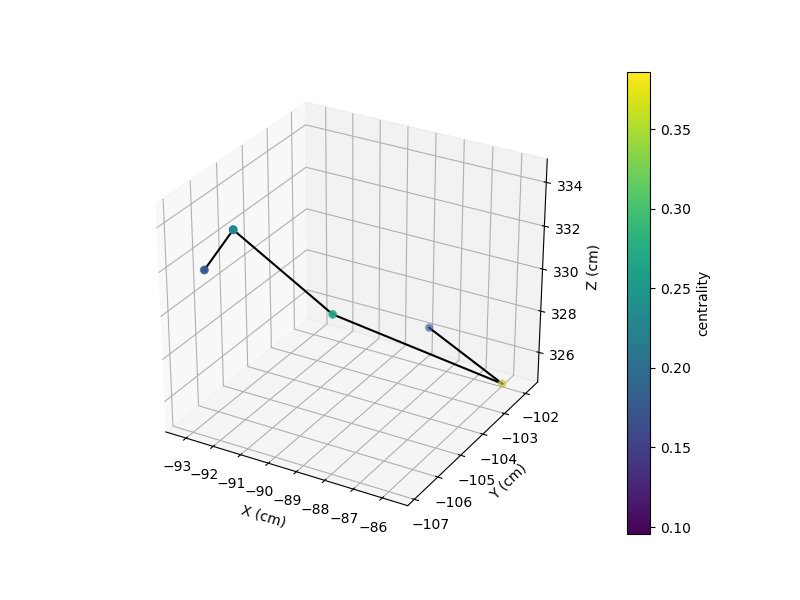

<IPython.core.display.Javascript object>


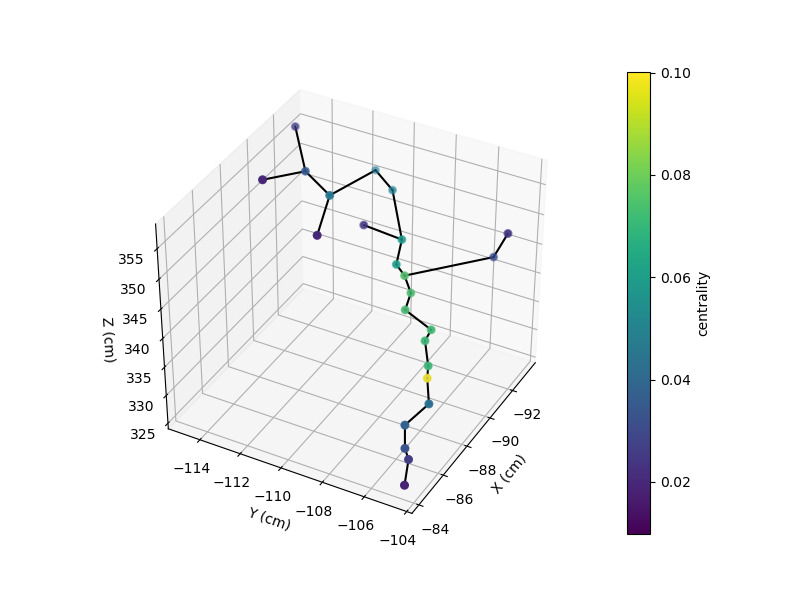

Event=349
Energy=[91.4]
Number of nodes=[27]


<IPython.core.display.Javascript object>


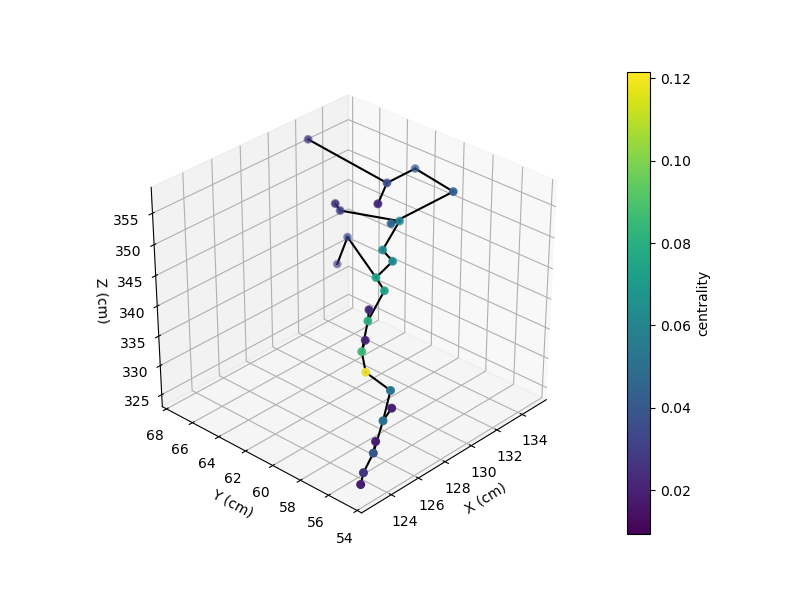

Event=54
Energy=[88.6, 5.85, 2.15]
Number of nodes=[24, 9, 4]


<IPython.core.display.Javascript object>


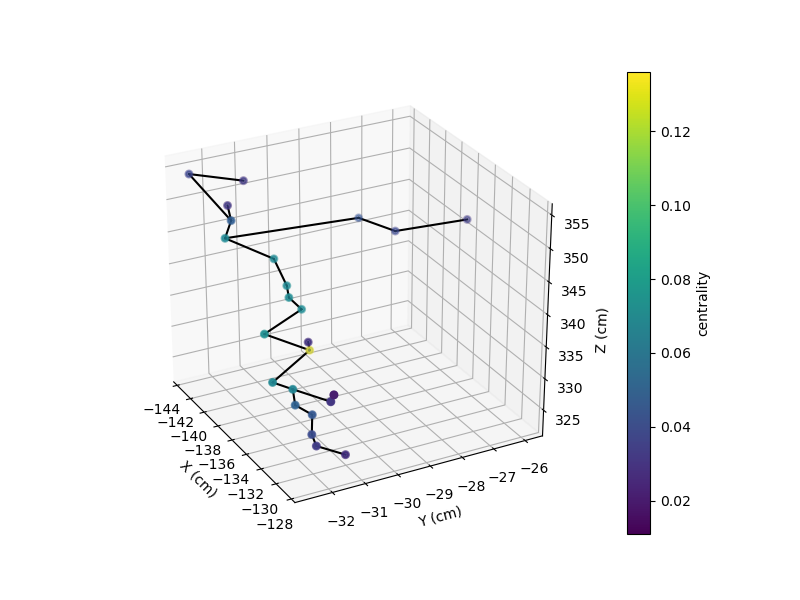

<IPython.core.display.Javascript object>


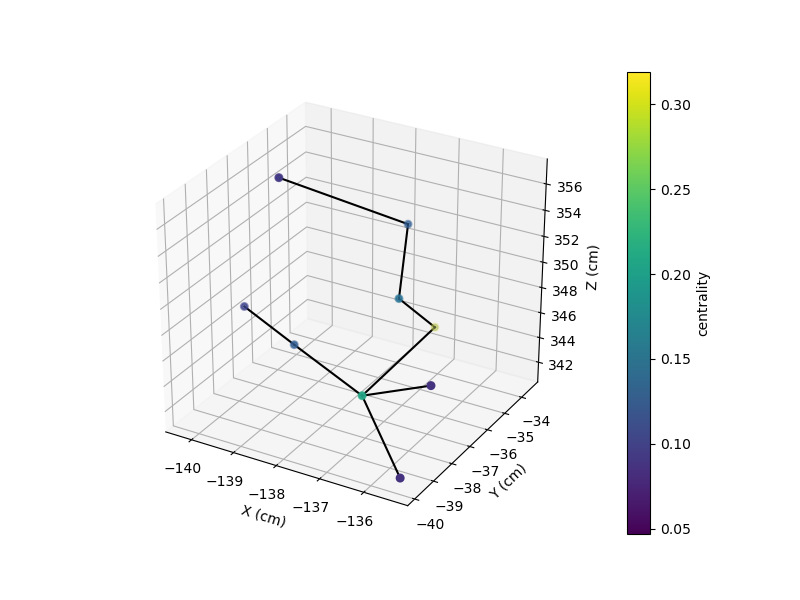

<IPython.core.display.Javascript object>


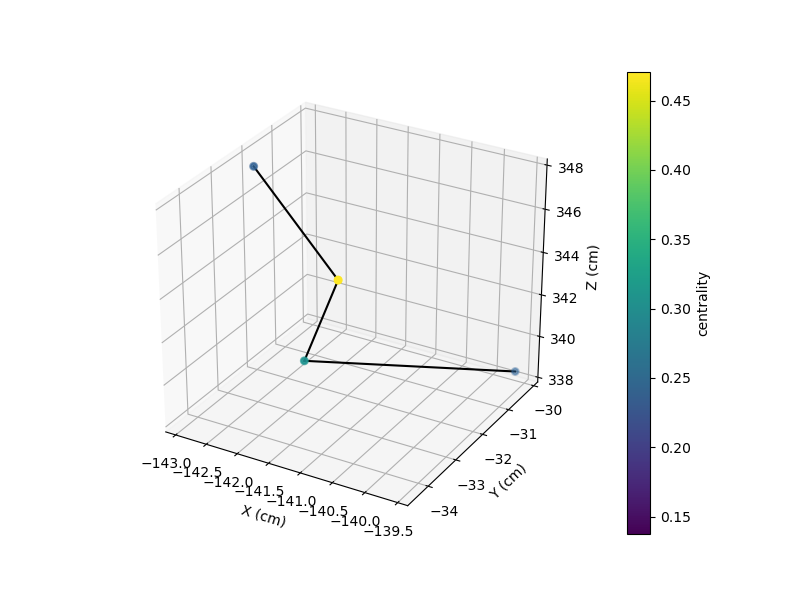

Event=38
Energy=[90.6]
Number of nodes=[28]


<IPython.core.display.Javascript object>


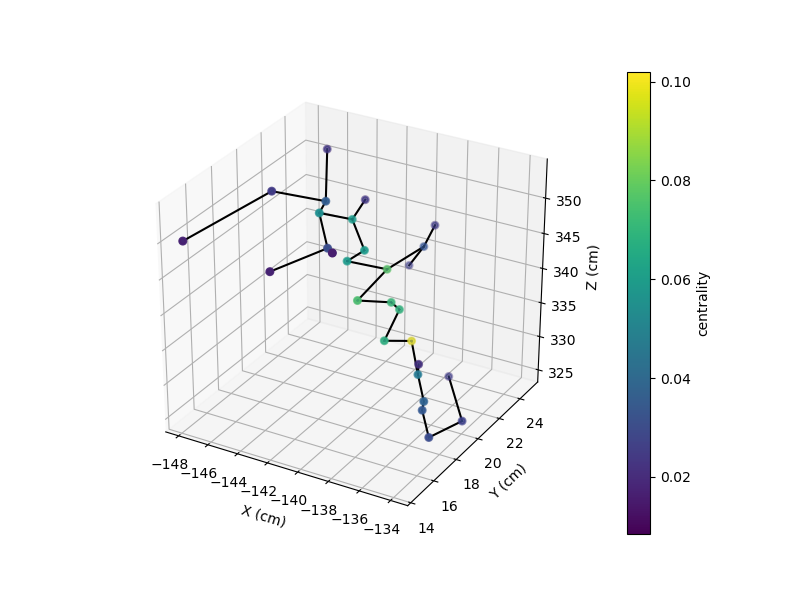

Event=244
Energy=[12.3, 82.4]
Number of nodes=[6, 20]


<IPython.core.display.Javascript object>


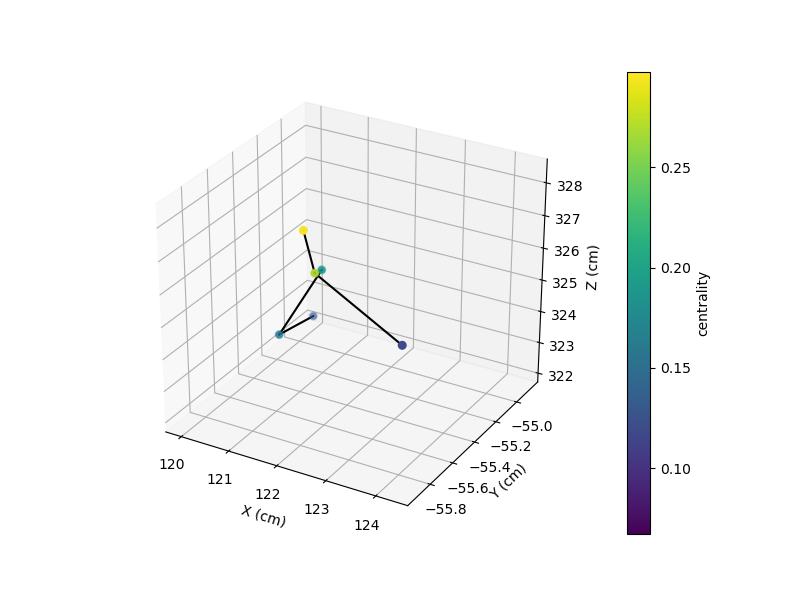

<IPython.core.display.Javascript object>


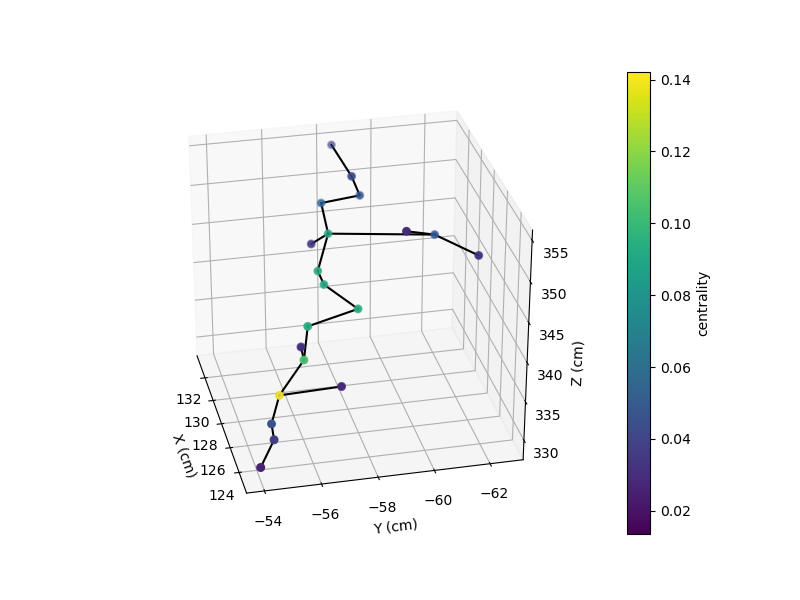

In [13]:
N=10
randomEvents=np.random.randint(0,450,N)

%matplotlib notebook
plt.style.use("default")

for i in randomEvents:
    #fig = plt.figure(figsize=(8,6))
    #ax = fig.add_subplot(111, projection='3d')
    plotEvent(trackstersE50D2,i,"centrality")


In [ ]:
N=10
randomEvents=np.random.randint(0,450,N)

%matplotlib inline
plt.style.use("default")
tracks=trackstersD5
fig = plt.figure(figsize=(8,6))
for nEvent in randomEvents:
    
    indexes = tracks['vertices_indexes'].array()[nEvent]
    x = tracks['vertices_x'].array()[nEvent]
    y = tracks['vertices_y'].array()[nEvent]
    z = tracks['vertices_z'].array()[nEvent]
    E = tracks['vertices_energy'].array()[nEvent]
    NTracks=len(x)
    print(f"Event={nEvent}")
    print(f"Energy={ak.sum(E,axis=1)}")
    print(f"Number of nodes={ak.count(indexes,axis=1)}")
    
    for i in range(NTracks):
        plt.scatter(x[i]-x[i][0],y[i]-y[i][0])

plt.show()

N=10
randomEvents=np.random.randint(0,450,N)

%matplotlib inline
plt.style.use("default")
tracks=trackstersE50D2
fig = plt.figure(figsize=(8,6))
for nEvent in randomEvents:
    
    indexes = tracks['vertices_indexes'].array()[nEvent]
    x = tracks['vertices_x'].array()[nEvent]
    y = tracks['vertices_y'].array()[nEvent]
    z = tracks['vertices_z'].array()[nEvent]
    E = tracks['vertices_energy'].array()[nEvent]
    NTracks=len(x)
    #print(f"Event={nEvent}")
    #print(f"Energy={ak.sum(E,axis=1)}")
    #print(f"Number of nodes={ak.count(indexes,axis=1)}")
    
    for i in range(NTracks):
        #print(z,E)
        plt.scatter(x[i]-x[i][0],y[i]-y[i][0])


plt.show()

In [ ]:
N=10
randomEvents=np.random.randint(0,450,N)

%matplotlib inline
plt.style.use("default")
tracks=trackstersE50D2
fig = plt.figure(figsize=(8,6))
for nEvent in randomEvents:
    
    indexes = tracks['vertices_indexes'].array()[nEvent]
    x = tracks['vertices_x'].array()[nEvent]
    y = tracks['vertices_y'].array()[nEvent]
    z = tracks['vertices_z'].array()[nEvent]
    E = tracks['vertices_energy'].array()[nEvent]
    NTracks=len(x)
    print(f"Event={nEvent}")
    print(f"Energy={ak.sum(E,axis=1)}")
    print(f"Number of nodes={ak.count(indexes,axis=1)}")
    
    for i in range(NTracks):
        #print(z,E)
        plt.scatter(z[i],E[i])


plt.show()